# Fixed-Targets Comparison

Compares genetic-algorithm accuracy vs. number of sensor nodes
for N=500, N=5000, and N=50000, all at the same average connectivity <K>
(gamma=1.8, N=5000 reference), with 50 drug targets per drug.

Two plots:
1. **Accuracy vs. feature count** — final-generation best accuracy for each feature size
2. **Training curves** — best accuracy per generation, faceted by N, coloured by feature size

## Config

In [4]:
import pathlib

# Paths to the ga-results-v2/ directories for each N.
# Each directory contains one CSV per network: 0.csv, 1.csv, ..., 49.csv
# New columns: original_network_idx, max_num_features, generation, best_accuracy, features

# v4 is fixed targets, v5 is scaling... despite the name..
GA_RESULTS = {
  500:   pathlib.Path('./data/drug-fixed-targets-v5/N500/ga-results-v5'),
  5000:   pathlib.Path('./data/drug-fixed-targets-v5/N5000/ga-results-v5'),
  50000:   pathlib.Path('./data/drug-fixed-targets-v5/N50000/ga-results-v5'),
  # 500:   pathlib.Path('../../data/drug-fixed-targets/N500/ga-results-v4'),
  # 5000:  pathlib.Path('../../data/drug-fixed-targets/N5000/ga-results-v4'),
  # 50000: pathlib.Path('../../data/drug-fixed-targets/N50000/ga-results-v4'),
}

PLOT_ACCURACY  = pathlib.Path('./plots/fixed-targets-accuracy-vs-features.png')
PLOT_TRAINING  = pathlib.Path('./plots/fixed-targets-training-curves.png')

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['text.usetex'] = False

## Load GA results

In [10]:
dfs = []
for N, results_dir in GA_RESULTS.items():
  csvs = [csv for csv in sorted(results_dir.glob('*-full.csv')) if not csv.name.startswith('combined')]
  if not csvs:
    print(f'WARNING: no CSVs found in {results_dir}')
    continue
  df = pd.concat([pd.read_csv(f) for f in csvs], ignore_index=True)
  df['N'] = N
  dfs.append(df)
  print(f'N={N}: {len(csvs)} network files, {len(df)} rows, '
        f'generations 0..{df["generation"].max()}, '
        f'feature sizes: {sorted(df["max_num_features"].unique())}')

all_df = pd.concat(dfs, ignore_index=True)

# final-generation rows: last recorded generation for each (network, feature_size)
final_df = (
  all_df
  .sort_values('generation')
  .groupby(['N', 'original_network_idx', 'max_num_features'], as_index=False)
  .last()
)

print(f'\ntotal rows: {len(all_df)},  final-generation rows: {len(final_df)}')
final_df.head()

N=500: 50 network files, 9447 rows, generations 0..30, feature sizes: [np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64), np.int64(128), np.int64(256), np.int64(500)]
N=5000: 50 network files, 5996 rows, generations 0..30, feature sizes: [np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64), np.int64(128), np.int64(256), np.int64(512), np.int64(1024), np.int64(2048), np.int64(4096), np.int64(5000)]
N=50000: 50 network files, 7879 rows, generations 0..30, feature sizes: [np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64), np.int64(128), np.int64(256), np.int64(512), np.int64(1024), np.int64(2048), np.int64(4096), np.int64(8192), np.int64(16384), np.int64(32768), np.int64(50000)]

total rows: 23322,  final-generation rows: 2050


,N,original_network_idx,max_num_features,generation,best_accuracy,avg_accuracy,features
0,500,0,1,30,0.181818,0.170000,{'node-263'}
1,500,0,2,30,0.363636,0.281818,"{'node-79', 'node-193'}"
2,500,0,4,30,0.636364,0.406364,"{'node-136', 'node-87', 'node-369', 'node-25'}"
3,500,0,8,3,1.000000,0.666364,"{'node-264', 'node-208', 'node-101', 'node-122..."
4,500,0,16,1,1.000000,0.883636,"{'node-166', 'node-103', 'node-193', 'node-106..."


In [13]:
final_df[(final_df.N == 5_000)&(final_df.max_num_features==8)&(final_df.generation <= 100)]

,N,original_network_idx,max_num_features,generation,best_accuracy,avg_accuracy,features
470,5000,0,8,5,1.000000,0.691818,"{'node-1708', 'node-2653', 'node-111', 'node-2..."
484,5000,1,8,3,1.000000,0.745455,"{'node-4604', 'node-3937', 'node-498', 'node-4..."
498,5000,2,8,1,1.000000,0.605455,"{'node-224', 'node-57', 'node-1572', 'node-408..."
512,5000,3,8,1,1.000000,0.652727,"{'node-124', 'node-3874', 'node-3732', 'node-2..."
526,5000,4,8,2,1.000000,0.726364,"{'node-1469', 'node-1124', 'node-2839', 'node-..."
540,5000,5,8,2,1.000000,0.644545,"{'node-2746', 'node-1727', 'node-3848', 'node-..."
554,5000,6,8,10,1.000000,0.681818,"{'node-2030', 'node-4424', 'node-2927', 'node-..."
568,5000,7,8,3,1.000000,0.657273,"{'node-2305', 'node-2439', 'node-1596', 'node-..."
582,5000,8,8,12,1.000000,0.614545,"{'node-3680', 'node-252', 'node-216', 'node-41..."
596,5000,9,8,4,1.000000,0.663636,"{'node-389', 'node-937', 'node-2365', 'node-18..."


<Axes: xlabel='generation', ylabel='Count'>

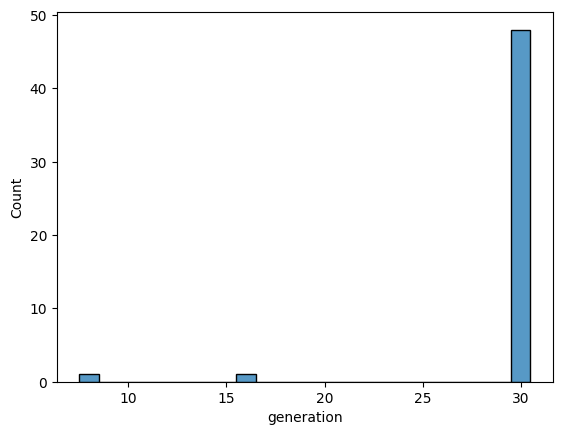

In [11]:
sns.histplot(final_df[(final_df.N == 5_000)&(final_df.max_num_features==4)&(final_df.generation < 100)].generation, discrete=True)

## Plot: accuracy vs. number of sensor nodes

saved to plots/fixed-targets-accuracy-vs-features.png


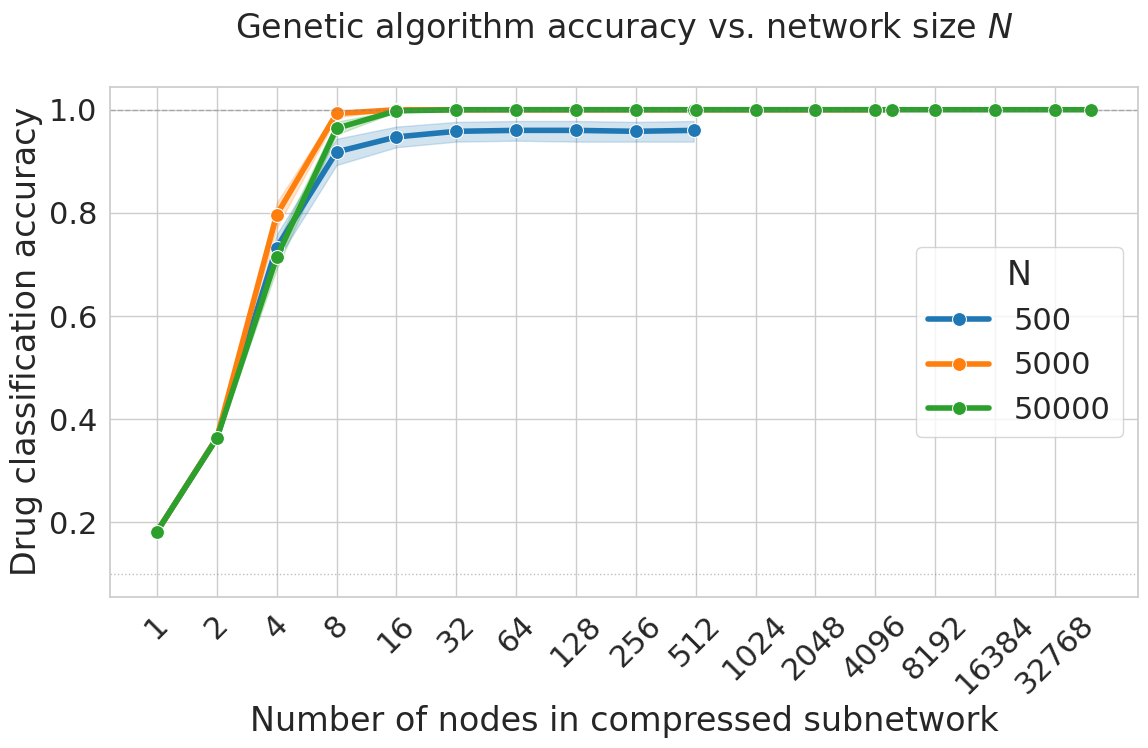

In [36]:
feature_sizes = sorted(final_df['max_num_features'].unique())

# Fill missing (network, feature_size) combinations with 1.0 so every point
# averages over the same 50 networks. Networks that stopped early (perfect
# accuracy at a smaller feature size) never ran larger ones — assume 1.0.
plot_df = (
  final_df[['N', 'original_network_idx', 'max_num_features', 'best_accuracy']]
  .pivot(index=['N', 'original_network_idx'], columns='max_num_features', values='best_accuracy')
  .fillna(1.0)
  .stack()
  .reset_index(name='best_accuracy')
)
plot_df = plot_df[plot_df.max_num_features <= plot_df.N]

with sns.plotting_context('notebook', font_scale=2.0), sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12, 8))
  g = sns.lineplot(
    data=plot_df,
    x='max_num_features',
    y='best_accuracy',
    hue='N',
    lw=4,
    marker='o',
    markersize=10,
    palette='tab10',
    ax=ax,
  )
  ax.set_xscale('log', base=2)
  ax.set_xticks(feature_sizes)
  ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
  ax.axhline(1.0, color='gray', lw=1, ls='--', alpha=0.5)
  ax.axhline(0.1, color='gray', lw=1, ls=':', alpha=0.5, label='random (10 drugs)')
  ax.set_xticks(2**np.arange(15+1))
  ax.tick_params(axis='x', labelrotation=45)
  g.set(
    xlabel='Number of nodes in compressed subnetwork',
    ylabel='Drug classification accuracy',
    title='Genetic algorithm accuracy vs. network size $N$\n',
          # '(same $\\langle K \\rangle$, 10 drugs, 50 targets, power-law)',
  )
  plt.tight_layout()

PLOT_ACCURACY.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(PLOT_ACCURACY, bbox_inches='tight', dpi=300)
print(f'saved to {PLOT_ACCURACY}')

In [31]:
plot_df[plot_df.max_num_features == 512]

,N,original_network_idx,max_num_features,best_accuracy
10,500,0,512,1.0
25,500,1,512,1.0
40,500,2,512,1.0
55,500,3,512,1.0
70,500,4,512,1.0
...,...,...,...,...
1435,5000,45,512,1.0
1450,5000,46,512,1.0
1465,5000,47,512,1.0
1480,5000,48,512,1.0


## Training curves: best accuracy per generation

One subplot per N. Each line is one feature size (averaged across 50 networks, with std shading).
Shows how quickly the GA converges and whether early stopping (plateau / perfect accuracy) fired.


/tmp/ipykernel_2582355/3140012934.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11, title='feature size')


saved to ../../plots/fixed-targets-training-curves.png


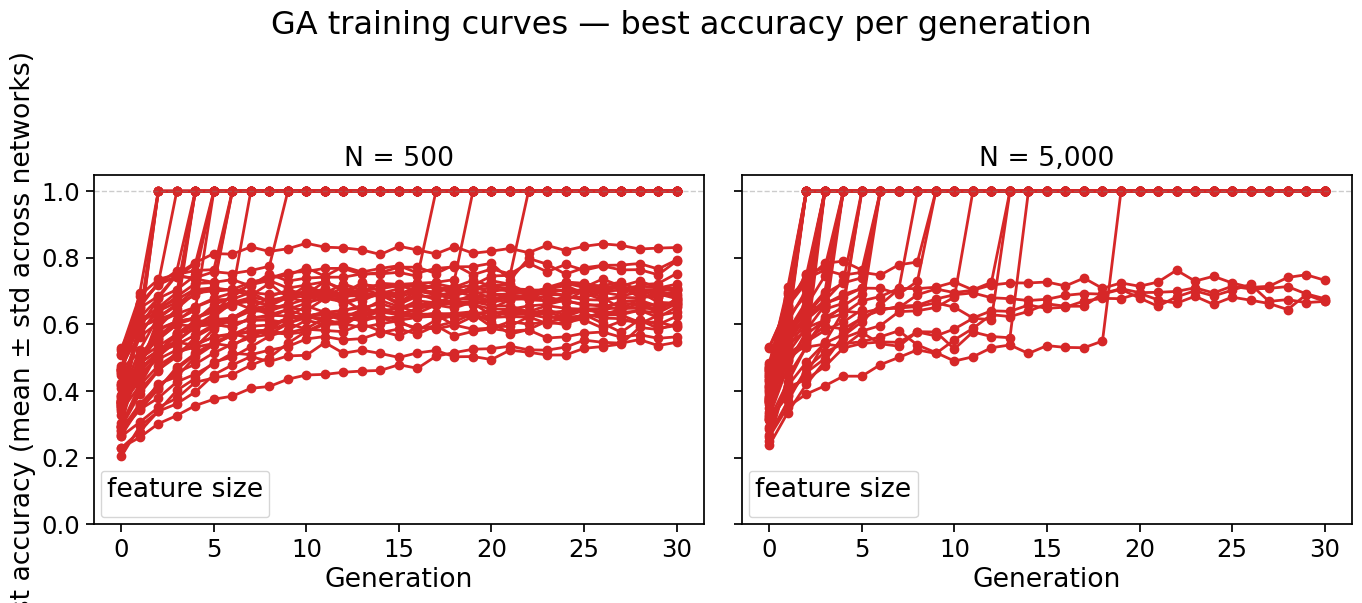

In [11]:
Ns = sorted(all_df['N'].unique())
n_cols = len(Ns)
palette = sns.color_palette('tab10', n_colors=len(feature_sizes))
fs_to_color = dict(zip(feature_sizes, palette))

with sns.plotting_context('notebook', font_scale=1.6):
  fig, axes = plt.subplots(1, n_cols, figsize=(7 * n_cols, 6), sharey=True)
  if n_cols == 1:
    axes = [axes]

  for ax, N in zip(axes, Ns):
    sub = all_df[all_df['N'] == N]
    all_generations = np.arange(0, sub['generation'].max() + 1)

    for fs in [8]:#feature_sizes:
      fs_sub = sub[(sub['max_num_features'] == fs) & (sub['original_network_idx'] <= 50)]
      if fs_sub.empty:
        continue

      # Pivot: rows=networks, columns=generations.
      # Networks that stopped early (perfect accuracy / patience) have no rows
      # for later generations — fill those missing entries with 1.0 so every
      # generation is averaged over the same number of networks.
      pivot = (
        fs_sub
        .pivot(index='original_network_idx', columns='generation', values='avg_accuracy')
        .reindex(columns=all_generations)
        .fillna(1.0)
      )
      mean = pivot.mean(axis=0)
      std  = pivot.std(axis=0)

      color = fs_to_color[fs]

      # ax.plot(all_generations, mean, color=color, lw=2, label=f'k={fs}')
      for _, row in pivot.iterrows():
        ax.plot(all_generations, row.values, color=color, lw=2, alpha=1, marker='o')
      # ax.fill_between(all_generations, mean - std, mean + std, alpha=0.15, color=color)

    ax.axhline(1.0, color='gray', lw=1, ls='--', alpha=0.4)
    ax.set_xlabel('Generation')
    ax.set_title(f'N = {N:,}')
    ax.set_ylim(0, 1.05)
    ax.legend(fontsize=11, title='feature size')

  axes[0].set_ylabel('Best accuracy (mean ± std across networks)')
  fig.suptitle(
    'GA training curves — best accuracy per generation\n',
    # '(10 drugs, 50 targets, power-law, same $\\langle K \\rangle$)',
    y=1.02,
  )
  plt.tight_layout()

PLOT_TRAINING.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(PLOT_TRAINING, bbox_inches='tight', dpi=300)
print(f'saved to {PLOT_TRAINING}')

In [6]:
pivot

generation,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
original_network_idx,,,,,,,,,,,,,,,,,,,,,
1,0.909091,0.909091,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17,0.909091,0.909091,0.909091,0.909091,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
41,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
48,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Summary statistics

In [90]:
summary = (
  final_df
  .groupby(['N', 'max_num_features'])['best_accuracy']
  .agg(['mean', 'std', 'count'])
  .rename(columns={'mean': 'mean_accuracy', 'std': 'std_accuracy', 'count': 'n_networks'})
  .reset_index()
)
summary['stderr'] = summary['std_accuracy'] / np.sqrt(summary['n_networks'])
summary

,N,max_num_features,mean_accuracy,std_accuracy,n_networks,stderr
0,500,1,0.181818,0.000000,50,0.000000
1,500,4,0.761818,0.091630,50,0.012958
2,500,16,0.949907,0.076649,49,0.010950
3,500,64,0.904306,0.082843,19,0.019005
4,5000,1,0.181818,0.000000,50,0.000000
5,5000,4,0.909091,0.117363,7,0.044359
6,5000,16,1.000000,0.000000,2,0.000000
